## Mood classfication using CNN (HAPPY / SAD)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image 
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
#image data generator is the package to lable the images & it will automatically lable all the images

In [14]:
img = image.load_img(r'C:\Users\kdata\Desktop\KODI WORK\0. DATASCIENCE PROJECT\19. CNN - Happy  or Sad\training\happy\3.jpg')

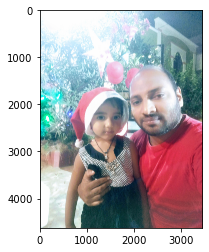

In [15]:
plt.imshow(img)

In [16]:
i1 = cv2.imread(r'C:\Users\kdata\Desktop\KODI WORK\0. DATASCIENCE PROJECT\19. CNN - Happy  or Sad\training\happy\3.jpg')
i1
# 3 dimension metrics are created for the image
# the value ranges from 0-255

array([[[253, 250, 245],
        [254, 251, 246],
        [253, 253, 247],
        ...,
        [112,  92,  45],
        [117,  97,  50],
        [117,  97,  50]],

       [[252, 249, 244],
        [253, 250, 245],
        [252, 252, 246],
        ...,
        [112,  92,  45],
        [115,  95,  48],
        [114,  94,  47]],

       [[251, 250, 246],
        [252, 251, 247],
        [253, 252, 248],
        ...,
        [115,  95,  48],
        [115,  95,  48],
        [112,  92,  45]],

       ...,

       [[221, 221, 203],
        [224, 224, 206],
        [226, 227, 207],
        ...,
        [ 61,  51, 134],
        [ 59,  49, 132],
        [ 57,  47, 130]],

       [[214, 214, 196],
        [218, 218, 200],
        [222, 223, 203],
        ...,
        [ 65,  55, 138],
        [ 62,  52, 135],
        [ 60,  50, 133]],

       [[210, 210, 192],
        [215, 215, 197],
        [220, 220, 202],
        ...,
        [ 64,  55, 141],
        [ 62,  53, 139],
        [ 60,  51, 137]]

In [17]:
i1.shape
# shape of your image height, weight, rgb

(4623, 3460, 3)

In [18]:
train = ImageDataGenerator(rescale = 1/255)
validataion = ImageDataGenerator(rescale = 1/255)
# to scale all the images i need to divide with 255
# we need to resize the image using 200, 200 pixel

In [19]:
train_dataset = train.flow_from_directory(r'C:\Users\kdata\Desktop\KODI WORK\0. DATASCIENCE PROJECT\19. CNN - Happy  or Sad\training',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')
validataion_dataset = validataion.flow_from_directory(r'C:\Users\kdata\Desktop\KODI WORK\0. DATASCIENCE PROJECT\19. CNN - Happy  or Sad\validation',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')

Found 11 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [20]:
train_dataset.class_indices

{'happy': 0, 'not happy': 1}

In [21]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [22]:
# now we are applying maxpooling 

model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2), #3 filtr we applied hear
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),    
                                    #                       
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2), 
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    #
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
                                    ]
                                    )

In [23]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr = 0.001),
              metrics = ['accuracy']
              )

In [24]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs = 10,
                     validation_data = validataion_dataset)

  ...
    to  
  ['...']
Train for 3 steps
Epoch 1/10
3/3 [==============================] - 11s 4s/step - loss: 4.6628 - accuracy: 0.6250
Epoch 2/10
3/3 [==============================] - 4s 1s/step - loss: 1.3392 - accuracy: 0.5556
Epoch 3/10
3/3 [==============================] - 5s 2s/step - loss: 0.6831 - accuracy: 0.7500
Epoch 4/10
3/3 [==============================] - 4s 1s/step - loss: 0.2267 - accuracy: 0.8889
Epoch 5/10
3/3 [==============================] - 3s 1s/step - loss: 0.8343 - accuracy: 0.6667
Epoch 6/10
3/3 [==============================] - 3s 962ms/step - loss: 0.2889 - accuracy: 0.7778
Epoch 7/10
3/3 [==============================] - 4s 1s/step - loss: 0.0498 - accuracy: 1.0000
Epoch 8/10
3/3 [==============================] - 3s 979ms/step - loss: 0.0179 - accuracy: 1.0000
Epoch 9/10
3/3 [==============================] - 3s 944ms/step - loss: 0.0675 - accuracy: 1.0000
Epoch 10/10
3/3 [==============================] - 3s 989ms/step - loss: 0.1110 - accuracy: 

In [25]:
dir_path = r'C:\Users\kdata\Desktop\KODI WORK\0. DATASCIENCE PROJECT\19. CNN - Happy  or Sad\testing'
for i in os.listdir(dir_path ):
    print(i)
    #img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
   # plt.imshow(img)
   # plt.show()

1.jpg
2.jpg
3.jpg
4.jpg
IMG-20180430-WA0032.jpg
IMG_20180423_114930.jpg
IMG_20180822_205339.jpg
IMG_20180929_152642.jpg
IMG_20181007_214821.jpg


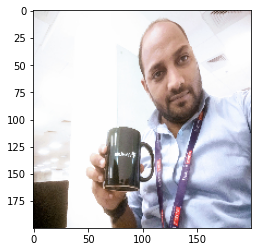

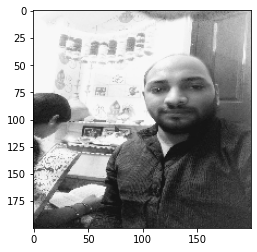

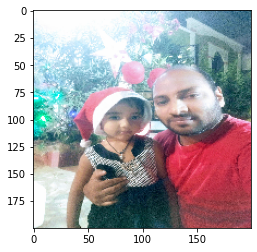

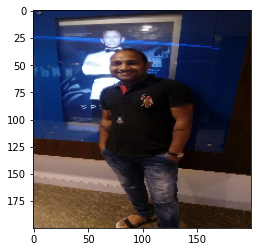

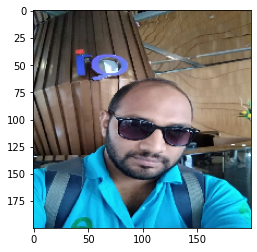

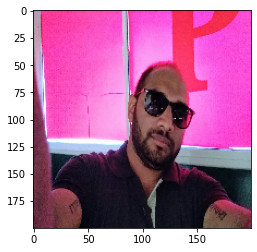

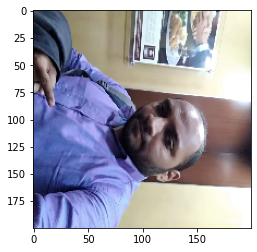

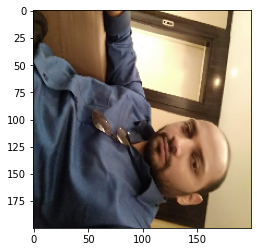

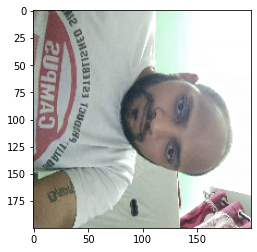

In [26]:
dir_path = r'C:\Users\kdata\Desktop\KODI WORK\0. DATASCIENCE PROJECT\19. CNN - Happy  or Sad\testing'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()

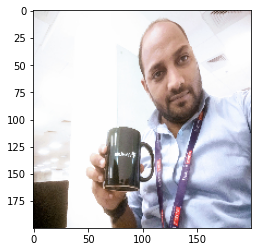

 i am not happy


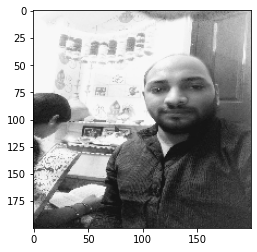

 i am not happy


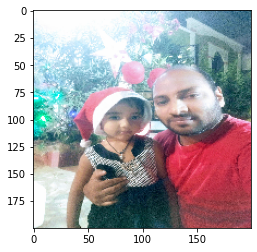

 i am not happy


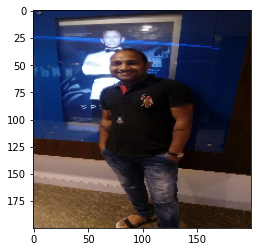

 i am not happy


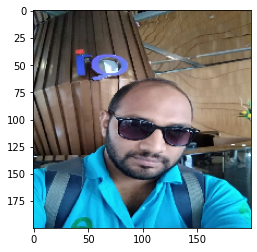

i am happy


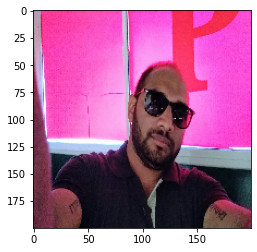

i am happy


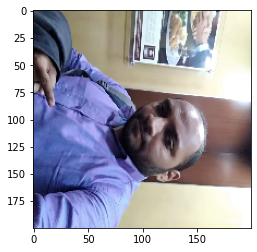

i am happy


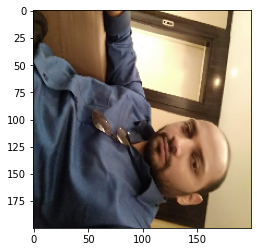

i am happy


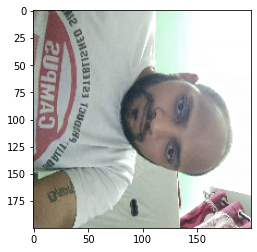

i am happy


In [27]:
dir_path = r'C:\Users\kdata\Desktop\KODI WORK\0. DATASCIENCE PROJECT\19. CNN - Happy  or Sad\testing'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()
        
    x= image.img_to_array(img)
    x=np.expand_dims(x,axis = 0)
    images = np.vstack([x])
    
    val = model.predict(images)
    if val == 0:
        print( ' i am not happy')
    else:
        print('i am happy')